In [3]:
import pandas as pd


In [4]:
import numpy as np


In [31]:
import matplotlib.pyplot as plt

In [43]:

import seaborn as sns

In [44]:
df=pd.read_csv('titanic.csv')

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
 df['Age'].isnull().mean()

np.float64(0.0)

In [21]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [22]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [23]:
df['Cabin'].unique()[:20]

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12'], dtype=object)

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [25]:
# Step 8: Drop irrelevant columns
# PassengerId is an identifier (not helpful for prediction)
# Ticket is messy; Cabin has many missing values — we drop them for this exercise
df_clean = df.drop(columns=['PassengerId', 'Ticket', 'Cabin'])
print('Columns after dropping:', df_clean.columns.tolist())

# Quick check: shape
print('Shape after dropping:', df_clean.shape)

Columns after dropping: ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Shape after dropping: (891, 9)


In [26]:
df_clean

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


In [27]:
df_clean.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [39]:
# Step 10: Convert categorical to numeric
# Encode 'Sex' column (male = 0, female = 1)
df_clean['Sex'] = df_clean['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' (drop_first=True to avoid multicollinearity)
df_clean = pd.get_dummies(df_clean, columns=['Embarked'], drop_first=True)

# Show head to confirm changes
print('After encoding Sex and Embarked:')
print(df_clean.head())

After encoding Sex and Embarked:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Title_Miss  Title_Mr  \
0         0       3    0  22.0      1      0   7.2500       False      True   
1         1       1    1  38.0      1      0  71.2833       False     False   
2         1       3    1  26.0      0      0   7.9250        True     False   
3         1       1    1  35.0      1      0  53.1000       False     False   
4         0       3    0  35.0      0      0   8.0500       False      True   

   Title_Mrs  Title_Rare  Embarked_Q  Embarked_S  
0      False       False       False        True  
1       True       False       False       False  
2      False       False       False        True  
3       True       False       False        True  
4      False       False       False        True  


In [40]:
df_clean.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Title_Miss,0
Title_Mr,0
Title_Mrs,0


In [28]:
# Step 11: Feature engineering — extract Title from Name
# This demonstrates how to create informative features from text columns.
df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify titles (map similar forms to common groups)
df_clean['Title'] = df_clean['Title'].replace(['Mlle', 'Ms'], 'Miss')
df_clean['Title'] = df_clean['Title'].replace(['Mme'], 'Mrs')

# Collapse rare titles into 'Rare' to avoid many low-frequency categories
rare_titles = df_clean['Title'].value_counts()[df_clean['Title'].value_counts() < 10].index
df_clean['Title'] = df_clean['Title'].replace(rare_titles, 'Rare')

# Drop original Name column as we've extracted Title
df_clean = df_clean.drop(columns=['Name'])

# Convert 'Title' to dummies
df_clean = pd.get_dummies(df_clean, columns=['Title'], drop_first=True)

# Show result
print('Columns after title engineering and encoding:')
print(df_clean.columns.tolist())

Columns after title engineering and encoding:
['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2803383330.py:3: SyntaxWarning: invalid escape sequence '\.'
  df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [29]:
# Step 13: Final check for remaining missing values and preview cleaned data
print('\nRemaining missing values per column:')
print(df_clean.isnull().sum())

print('\nPreview of cleaned dataset:')
print(df_clean.head())


Remaining missing values per column:
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title_Miss    0
Title_Mr      0
Title_Mrs     0
Title_Rare    0
dtype: int64

Preview of cleaned dataset:
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Title_Miss  \
0         0       3    male  22.0      1      0   7.2500        S       False   
1         1       1  female  38.0      1      0  71.2833        C       False   
2         1       3  female  26.0      0      0   7.9250        S        True   
3         1       1  female  35.0      1      0  53.1000        S       False   
4         0       3    male  35.0      0      0   8.0500        S       False   

   Title_Mr  Title_Mrs  Title_Rare  
0      True      False       False  
1     False       True       False  
2     False      False       False  
3     False       True       False  
4      True      False       False  


In [ ]:
 ##Exploratory Data Analysis (EDA)
##We visualize distributions and relationships to gain insight into the data and potential predictors.




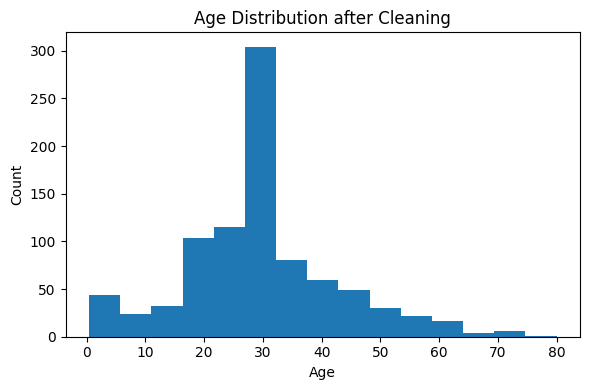

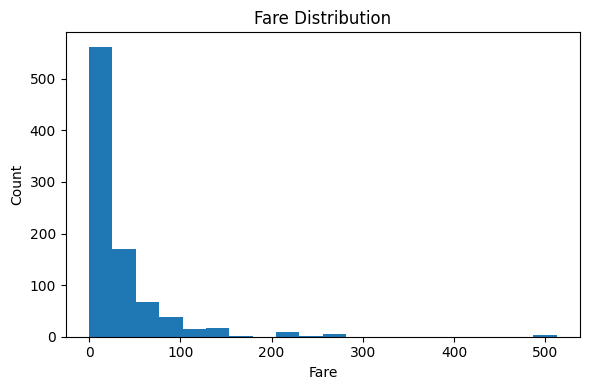

In [32]:
# Step 14: Distribution plots (Age and Fare)
plt.figure(figsize=(6,4))
plt.hist(df_clean['Age'], bins=15)
plt.title('Age Distribution after Cleaning')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df_clean['Fare'], bins=20)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


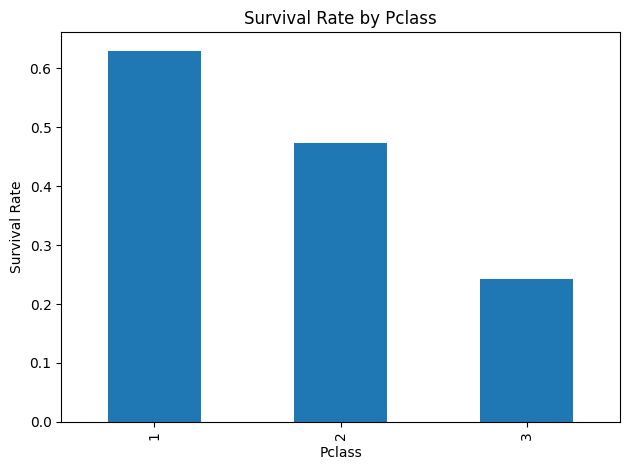


Survival rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


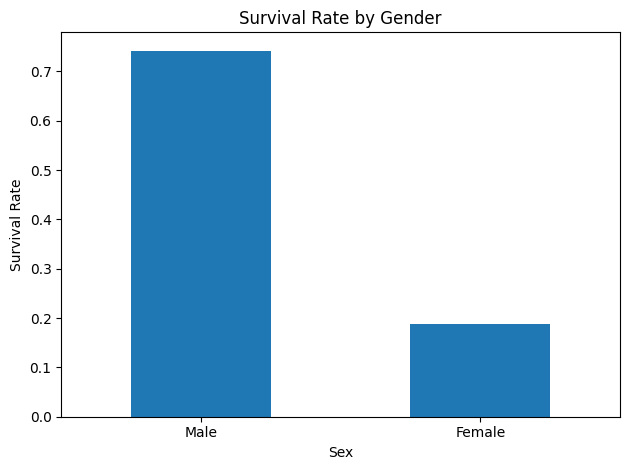

In [34]:
 #Step 15: Relationship between features and survival
# Survival rate by Pclass (ticket class)
pclass_survival = df_clean.groupby('Pclass')['Survived'].mean()
print('Survival rate by Pclass:')
print(pclass_survival)
pclass_survival.plot(kind='bar', title='Survival Rate by Pclass', ylabel='Survival Rate')
plt.tight_layout()
plt.show()

# Survival rate by Sex
sex_survival = df_clean.groupby('Sex')['Survived'].mean()
print('\nSurvival rate by Sex:')
print(sex_survival)
sex_survival.plot(kind='bar', title='Survival Rate by Gender', ylabel='Survival Rate')
plt.xticks([0,1], ['Male', 'Female'], rotation=0)
plt.tight_layout()
plt.show()

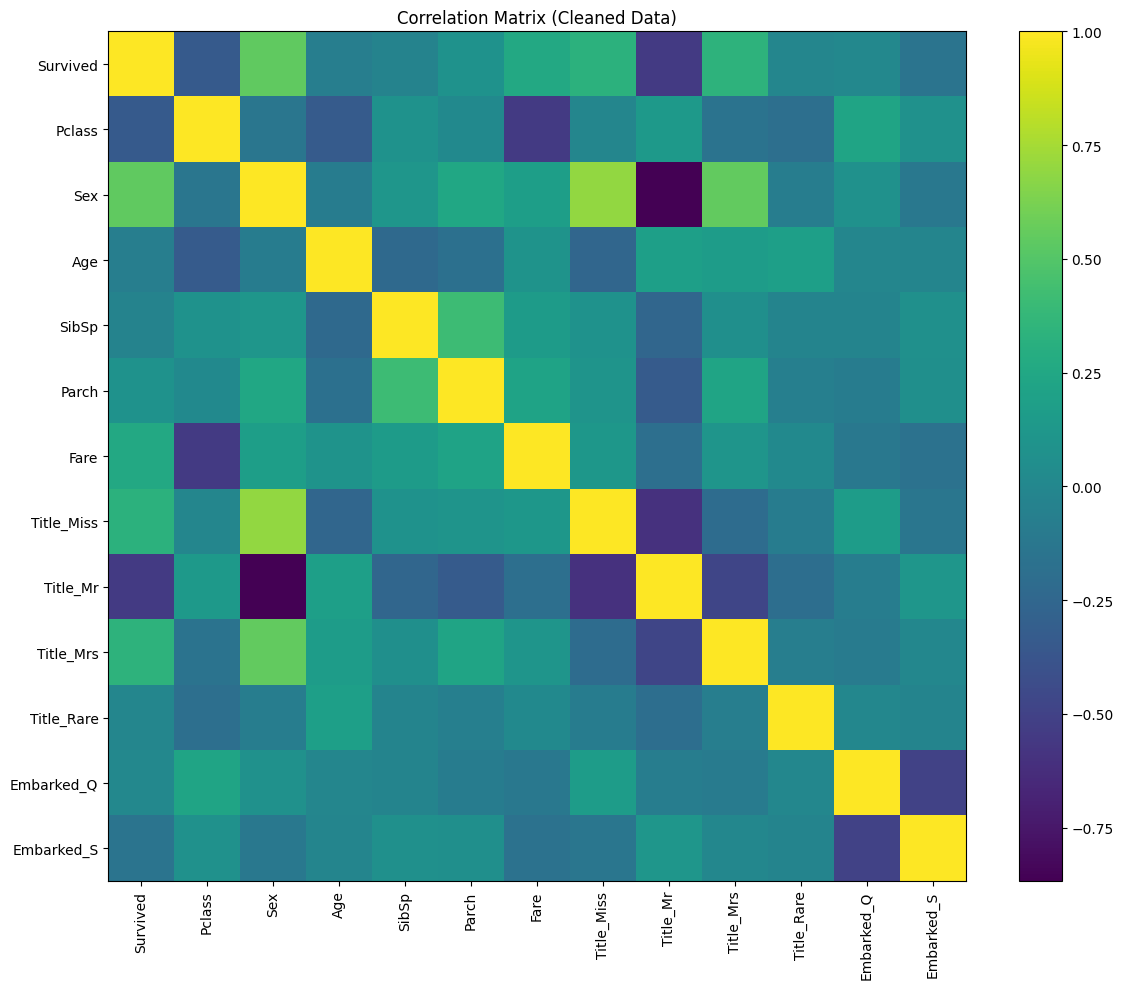

In [41]:
# Step 16: Correlation matrix (heatmap using matplotlib)
plt.figure(figsize=(12,10))
corr = df_clean.corr()
plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix (Cleaned Data)')
plt.tight_layout()
plt.show()

In [42]:
# Optional logistic regression baseline (simple and explainable)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare features and target
X = df_clean.drop(columns=['Survived'])
y = df_clean['Survived']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build pipeline with scaling + logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print('Test accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification report:')
print(classification_report(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Test accuracy: 0.8324022346368715

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.81      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion matrix:
[[98 12]
 [18 51]]


In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[98, 12],
       [18, 51]])

In [62]:
import pandas as pd

cm_df = pd.DataFrame(
    cm,
    index=['Actual: Non-Survived (0)', 'Actual: Survived (1)'],
    columns=['Predicted: Non-Survived (0)', 'Predicted: Survived (1)']
)

cm_df

,Predicted: Non-Survived (0),Predicted: Survived (1)
Actual: Non-Survived (0),98,12
Actual: Survived (1),18,51


In [63]:
TN, FP, FN, TP = cm.ravel()

print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

True Negatives (TN): 98
False Positives (FP): 12
False Negatives (FN): 18
True Positives (TP): 51


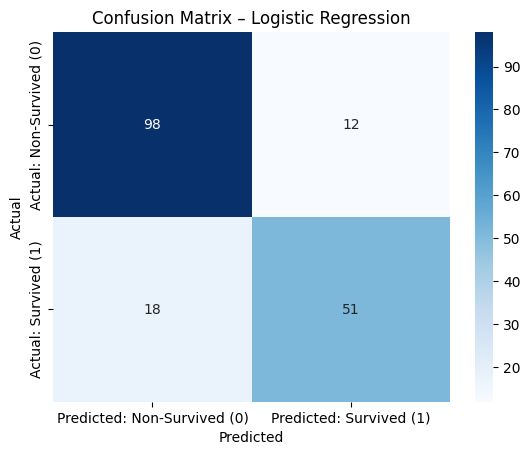

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.title('Confusion Matrix – Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()